## 任务2： 数据探索分析

数据探索分析是对每个用户整合后的数据表的进一步分析。根据任务需要，首先采样每个时间段内的时间序列进行特征提取，再探究多个特征的相关性分析与判别性分析，从而进行特征选择或降维，同时还将利用Python中绘制图形的库(如Seaborn、Matplotlib)进行一些可视化操作，辅助对数据的分析。

### 任务点2.1 时序特征的可视化与特征提取

对于一个属性特征（例如BVP），每个阶段的特征都是一条时间序列，通过可视化分析不同特征的变化规律，并选择合适的特征提取方法提前特征，反映其特点。例如提取时序特征的统计量，如最大值（max）、最小值（min）、均值（mean）、方差（variance）等，或者对时序特征进行建模。

参考资料：

![](https://ai-studio-static-online.cdn.bcebos.com/e7a38516c2ec47ae9354dce4c5537406ffec22ffc6d7455da53aa82d4580e6e5)

* 基于统计特征的分类特征提取

基于基本统计量的特征提取方法是最直接的特征提取方法。它是通过提取时间序列数据在统计学上的特征构成特征向量来指导后续的分类。对于时间序列的统计特征来说常常分为两类：时间域和频率域。时域上的特征又可以分为有量纲的特征和无量纲特征，有量纲特征如均值，方差，均方根，峰值等，无量纲特征有脉冲因子，峰值因数，波形因子等；而频率上的特征包括均方频率，均方根频率，频率方差，频率标准差等。

* 基于构建模型的分类特征提取

基于构建模型的特征提取方法，是通过对时间序列数据构建特定的模型，将对时间序列的特征提取转化为对模型中因子的提取。基于构建模型的特征提取方法首先需要分析数据的特点，然后根据不同数据的特点有针对的构建相应的模型。对于相对稳定的序列，如可以通过ＡＲＭＡ模型（自回归的搰动平均模型）去提取特征，而对于不稳定的序列，则需要先对数据进行差分处理，将其转化成稳定的序列。

* 基于变换的分类特征提取

基于变换方式的特征提取，是通过把时间序列数据在不同域中进行映射变换，使得特征在某一个维度能够凸显出来。常见的域变换就是时域和频域上的变换，典型的包括傅里叶变换和小波变换。这种变化针对不同的应用场景，又有了不同的应用形式，如ＤＦＴ（离散傅里叶变换），ＦＦＴ（快速傅里叶变换），ＳＴＦＴ（短时傅里叶变换），ＤＷＴ（离散小波变换）等。还有一些基于线性变换的方法，包括ＰＣＡ（主成分分析），Ｋ－Ｌ变换等。

* 基于分形理论的分类特征提取

分形的对象的特点包括不规则的，有自相似的结构，符合递归生成的原则。分形现象广泛的存在于自然界中，例如海岸线，山脉的轮廓，河流的流向，岩石、闪电的形状等等。随着分形理论的发展，近年来开始应用于时间序列的特征提取。分形理论进行特征提取时, 并不是所有信号都适合. 要看信号在某个尺度下是否具有可分形特征, 即不同状态下的分形维数是不同的, 这样才具有可分性。

In [38]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


C:\Users\aimer\AppData\Local\Temp\ipykernel_101200\3031747850.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_data[column] = (day_data[column] - min_val) / (max_val - min_val)


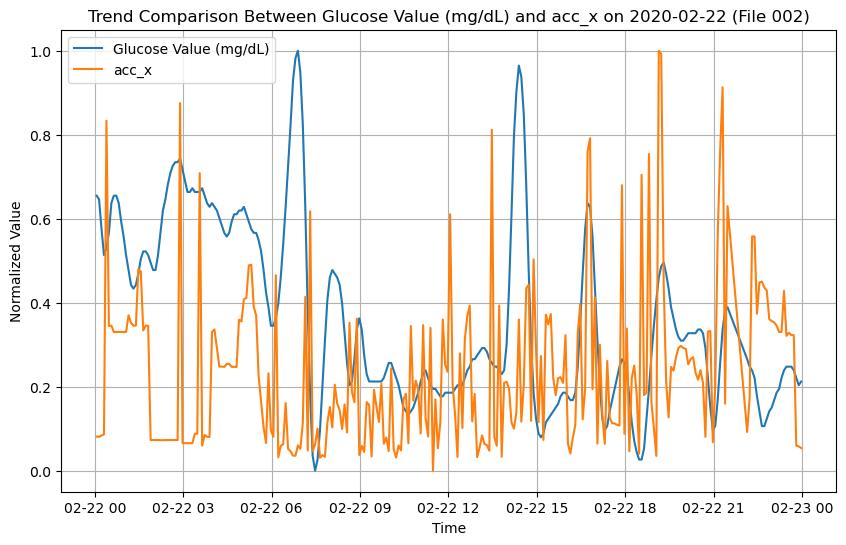

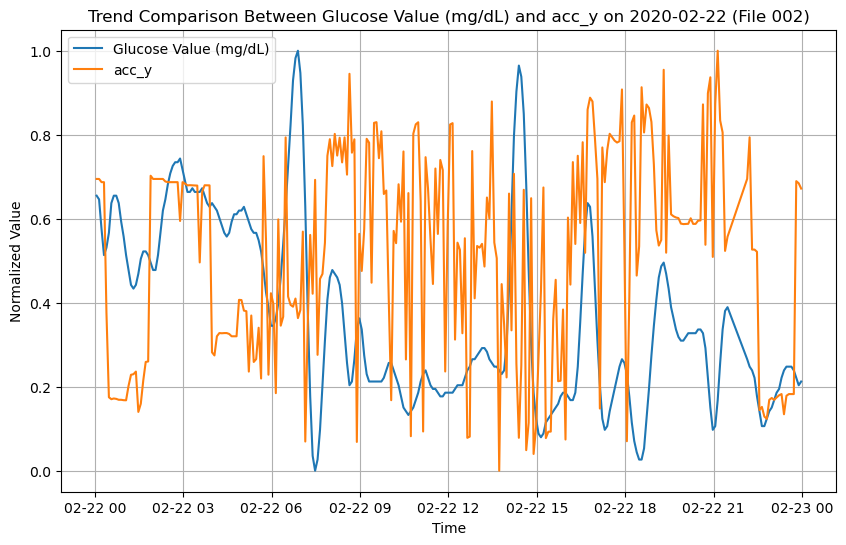

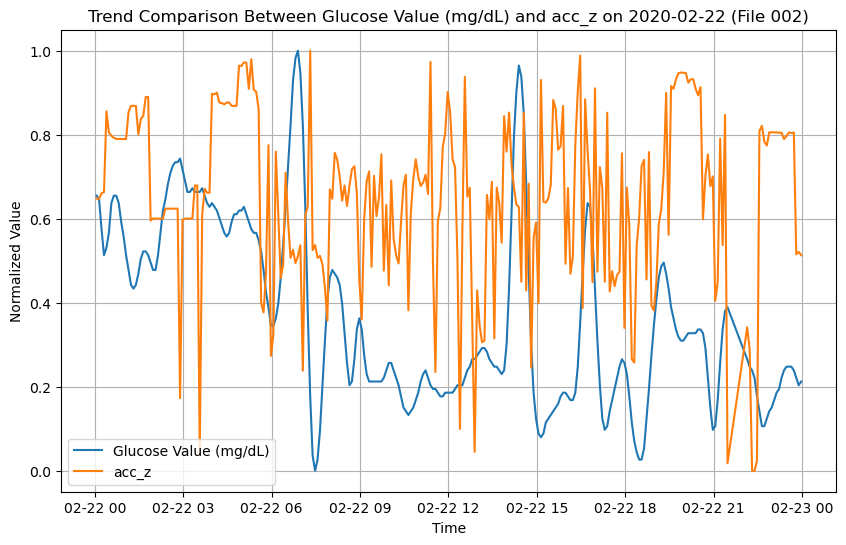

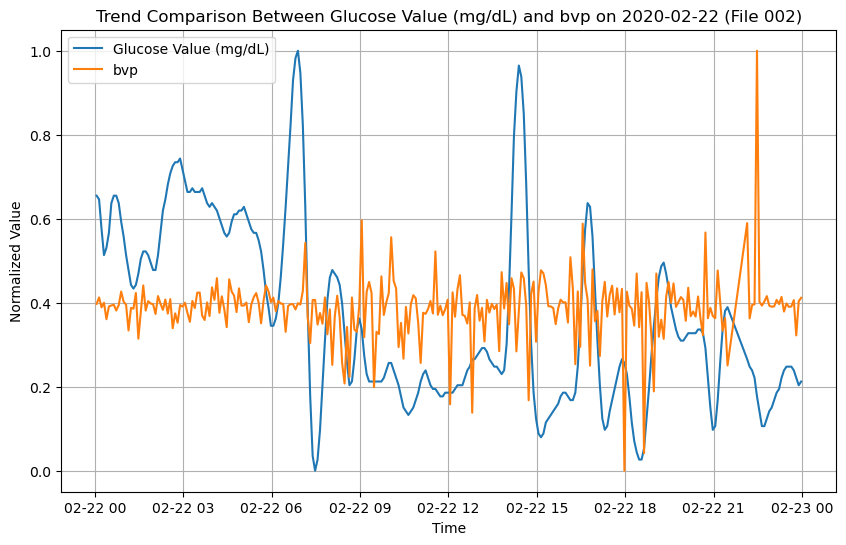

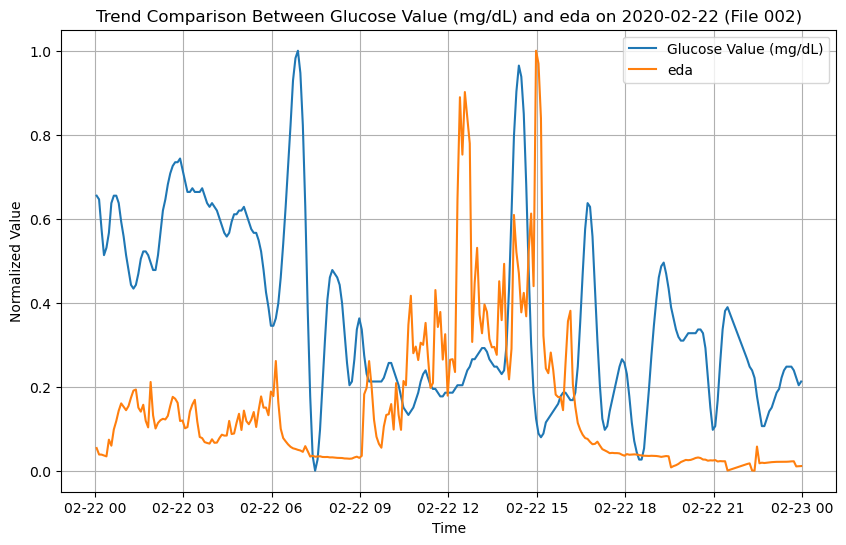

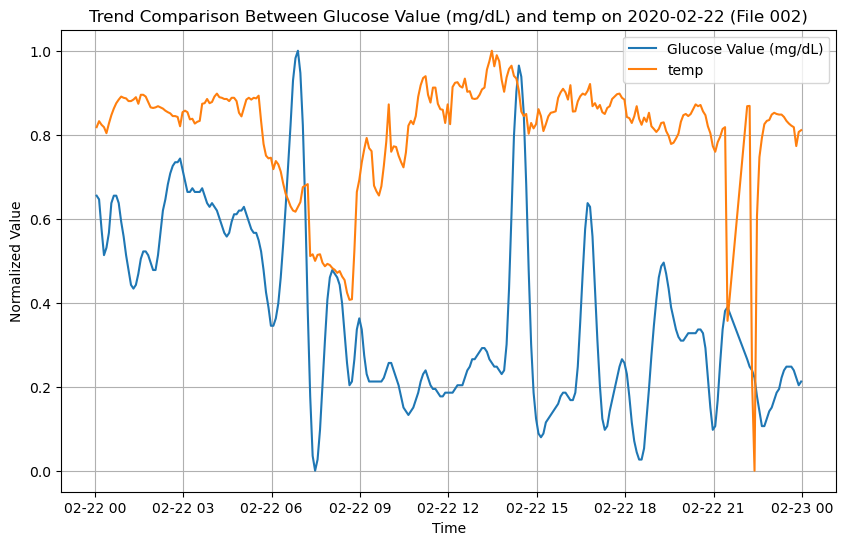

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# 定义高糖阈值
gaotang = 140

# 指定要绘制的文件编号
file_num = '002'

# 指定要绘制的一天
target_date = '2020-02-22'

# 读取 CSV 文件
data = pd.read_csv(f'processed_data/processed_data_{file_num}.csv')

# 将第一列转换为 datetime 类型
data['datetime'] = pd.to_datetime(data.iloc[:, 0], errors='coerce')

# 过滤出目标日期的数据
day_data = data[data['datetime'].dt.date == pd.to_datetime(target_date).date()]

# 获取第二列（假设是数值类型）
second_column = day_data.columns[1]

# 检查第二列是否为数值类型
if not pd.api.types.is_numeric_dtype(day_data[second_column]):
    raise ValueError(f"The second column '{second_column}' is not numeric.")

# 对每一列进行归一化处理
for column in day_data.select_dtypes(include=['number']).columns:
    min_val = day_data[column].min()
    max_val = day_data[column].max()
    if max_val != min_val:  # 避免除以0的情况
        day_data[column] = (day_data[column] - min_val) / (max_val - min_val)
    else:
        # 如果最大值等于最小值，意味着该列所有的值都是相同的，可以设置为0或1
        day_data[column] = 0  # 或者选择其他合适的值

# 获取所有非时间列
feature_columns = day_data.columns[1:8]

# 对于每一个特征列创建一个新的图形
for i, col in enumerate(feature_columns):
    if col != second_column and pd.api.types.is_numeric_dtype(day_data[col]):
        plt.figure(figsize=(10, 6))
        plt.plot(day_data['datetime'], day_data[second_column], label=second_column)
        plt.plot(day_data['datetime'], day_data[col], label=col)
        
        plt.title(f'Trend Comparison Between {second_column} and {col} on {target_date} (File {file_num})')
        plt.xlabel('Time')
        plt.ylabel('Normalized Value')
        plt.legend()
        plt.grid(True)
        
        # 显示图形
        plt.show()

我们抽样002样本的其中一天，其各个特征与血糖值的时序图。试图找出不同特征的时序特征与血糖的时序特征的关系
- 关于acc，其有明显的白天高，夜晚低的趋势。且波动较大。这是由于白天活动较多，晚上活动较少。思路：可以检测运动，如果是有氧运动则血糖应该有下降趋势，如果是无氧运动应该血糖会有上升趋势
- 关于bvp，由图，bvp即血容量在一天中十分稳定，只有在部分时间出现了剧烈波动，与其对应的是血糖最低点。猜测bvp的波动与血糖过低有关，或者仅仅只是异常值，可以通过其他数据验证。
- 关于eda，eda为皮肤电刺激信号，通常与人的压力水平有关。而压力高导致的皮质醇浓度升高会导致血糖升高。由图中可以看出，其与血糖有一定的同峰情况，可以检测eda的高低来辅助推断血糖高低。
- 关于temp,对于002样本，在早上和入睡时降低明显。但可能是个人体质不一，需要验证。
- 关于hr和ibi,整体呈负相关，hr在白天高，晚上较低，ibi则相反。

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# 定义高糖阈值
gaotang = 140

# 生成从 '002' 到 '016' 的文件编号
file_nums = [f'{i:03d}' for i in range(2, 17)]

# 窗口大小设置为1小时
window_size = 12  # 1小时，12个数据点

# 步长设置为5分钟
step = 1  # 5分钟，1个数据点

# 需要统计的列名列表
columns_of_interest = ['acc_x', 'acc_y', 'acc_z', 'bvp', 'eda', 'temp', 'ibi','hr']

# 需要累加的列名列表
cumulative_columns = ['calorie', 'total_carb', 'sugar', 'protein']

# 假设采样率为1个数据点/分钟
sampling_rate = 1  # 单位为数据点/分钟

for file_num in file_nums:
    # 读取 CSV 文件
    data = pd.read_csv(f'processed_data/processed_data_{file_num}.csv')
    
    # 立即统一列名格式
    data.columns = data.columns.str.strip().str.replace(' ', '_')
    
    # 将第一列转换为 datetime 类型
    data['datetime'] = pd.to_datetime(data.iloc[:, 0])
    
    # 如果整个文件的数据不足一个窗口大小，则跳过该文件
    if len(data) < window_size:
        print(f"File {file_num}: Insufficient data for sliding window.")
        continue
    
    # 初始化特征列表
    features = []
    
    # 滑动窗口统计特征
    for i in range(0, len(data) - window_size + 1, step):
        window = data.iloc[i:i + window_size]
        
        # 统一窗口内的列名格式
        window.columns = window.columns.str.strip().str.replace(' ', '_')
        
        # 计算血糖值 >= 140 的频数
        glucose_freq = (window['Glucose_Value_(mg/dL)'] >= gaotang).sum()
        
        # 计算其他列的统计量
        stats = {}
        for col in columns_of_interest:
            stats[col] = {
                'mean': window[col].mean(),
                'std': window[col].std(),
                'max': window[col].max(),
                'min': window[col].min(),
                'delta': window[col].iloc[-1] - window[col].iloc[0]
            }
            
            # 计算频谱特征
            freqs, psd = welch(window[col], fs=sampling_rate, nperseg=len(window)//2)
            stats[col]['peak_freq'] = freqs[psd > np.percentile(psd, 90)].tolist()  # 找到前10%的峰值频率
        
        # 计算累积列的和
        cumulative_sum = {}
        for col in cumulative_columns:
            cumulative_sum[col] = window[col].sum()
        
        # 添加滑动窗口结束位置的时间戳
        end_time = window['datetime'].iloc[-1]
        
        # 展开嵌套字典
        flattened_stats = {'glucose_freq': glucose_freq, 'end_time': end_time}
        for col in columns_of_interest:
            for key in stats[col]:
                flattened_stats[f"{col}_{key}"] = stats[col][key]
        
        # 添加累积列的和
        for col in cumulative_columns:
            flattened_stats[f"{col}_sum"] = cumulative_sum[col]
        
        features.append(flattened_stats)
    
    # 转换为DataFrame
    window_features = pd.DataFrame(features)
    
    # 保存到文件
    window_features.to_csv(f'window_data/sliding_window_features_{file_num}.csv', index=False)

    print(f"File {file_num}: Sliding window feature extraction completed with end timestamps and cumulative sums.")

File 002: Sliding window feature extraction completed with end timestamps and cumulative sums.
File 003: Sliding window feature extraction completed with end timestamps and cumulative sums.
File 004: Sliding window feature extraction completed with end timestamps and cumulative sums.
File 005: Sliding window feature extraction completed with end timestamps and cumulative sums.
File 006: Sliding window feature extraction completed with end timestamps and cumulative sums.
File 007: Sliding window feature extraction completed with end timestamps and cumulative sums.
File 008: Sliding window feature extraction completed with end timestamps and cumulative sums.
File 009: Sliding window feature extraction completed with end timestamps and cumulative sums.
File 010: Sliding window feature extraction completed with end timestamps and cumulative sums.
File 011: Sliding window feature extraction completed with end timestamps and cumulative sums.
File 012: Sliding window feature extraction comple

### 任务点2.2 特征相关性分析与可视化

通过观察不同特征的分布特点，统计特征之间的相关性系数，再进行可视化展示。
可以通过python中的matplotlib工具包和seaborn工具实现可视化。

In [44]:
import pandas as pd

# 生成从 '002' 到 '016' 的文件编号
file_nums = [f'{i:03d}' for i in range(2, 17)]

# 定义一个函数来清理包含方括号的字符串
def remove_brackets(value):
    if isinstance(value, str):
        return value.replace('[', '').replace(']', '')
    return value

for file_num in file_nums:
    # 加载数据
    data = pd.read_csv(f'window_data/sliding_window_features_{file_num}.csv')
    
    # 应用 remove_brackets 函数处理 DataFrame 中的每个元素
    data = data.applymap(remove_brackets)
    
    # 保存修改后的数据回到原文件
    data.to_csv(f'window_data/sliding_window_features_{file_num}.csv', index=False)

C:\Users\aimer\AppData\Local\Temp\ipykernel_101200\3090928809.py:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(remove_brackets)
C:\Users\aimer\AppData\Local\Temp\ipykernel_101200\3090928809.py:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(remove_brackets)
C:\Users\aimer\AppData\Local\Temp\ipykernel_101200\3090928809.py:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(remove_brackets)
C:\Users\aimer\AppData\Local\Temp\ipykernel_101200\3090928809.py:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(remove_brackets)
C:\Users\aimer\AppData\Local\Temp\ipykernel_101200\3090928809.py:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(remove_brackets)
C:\Users\aimer\AppData\Local\Temp\ipykernel_1

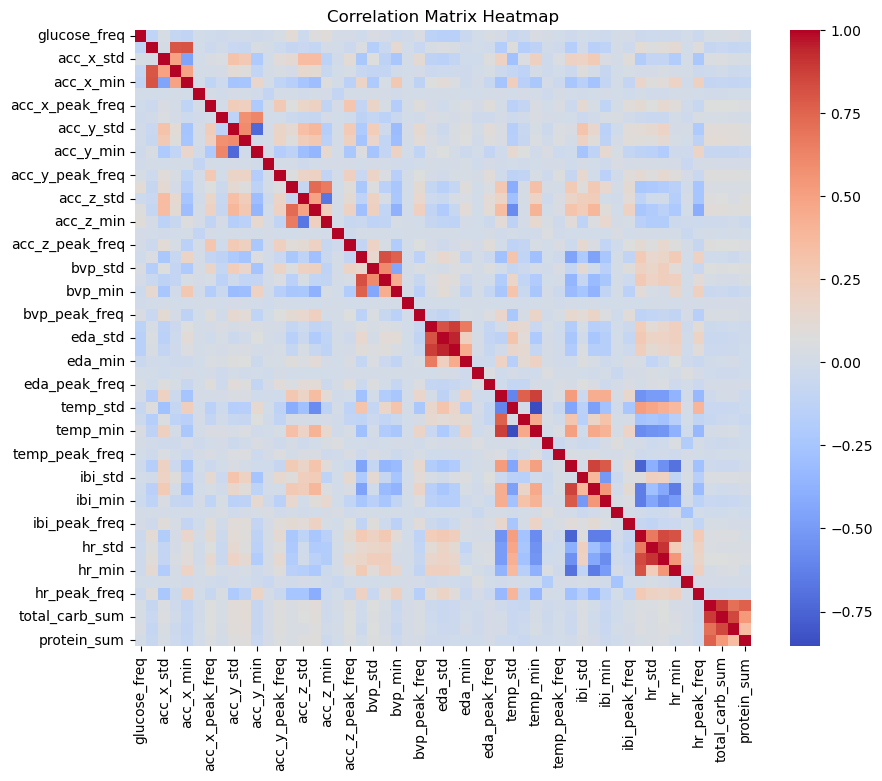

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 生成从 '002' 到 '016' 的文件编号
file_nums = [f'{i:03d}' for i in range(2, 17)]

# 初始化一个空的 DataFrame 用于存储所有文件的数据
all_data = pd.DataFrame()

for file_num in file_nums:
    # 加载数据
    data = pd.read_csv(f'window_data/sliding_window_features_{file_num}.csv')
    
    # 选择除了第二列（假设是 'end_time'）之外的所有列
    # 假设第二列是 'end_time'
    selected_columns = [col for col in data.columns if col != 'end_time']
    data_selected = data[selected_columns]
    
    # 将当前文件的数据追加到 all_data 中
    all_data = pd.concat([all_data, data_selected])

# 计算相关系数矩阵
correlation_matrix = all_data.corr()

# 绘制热力图
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

由相关性热力图可以看出，血糖水平与其他特征几乎没有直接的线性相关关系。只有在11号用户中与temp,ibi由一定正相关性，与eda,hr有一定负相关性。
其他比较稳定的相关性只有hr和ibi有稳定的负相关。

### 任务点2.3 特征工程

根据任务2.2对特征相关性与判别性的分析，汇总对目标任务有用的特征进行建模；将所有有用属性提取的特征拼接在一起，形成一个完整的样本矩阵，每一行表示一个阶段的观测数据（样本），每一列表示提取的一个特征值。
另外，针对某个时间段的高糖预测，可多采集前一个小时的观测数据，和当前时间段的数据一起作为样本的时序特征，以预测对发生高糖的可能性。

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

# 生成文件编号
file_nums = [f'{i:03d}' for i in range(2, 17)]

# 初始化一个空的DataFrame用于存储所有数据
data_all = pd.DataFrame()

for file_num in file_nums:
    # 加载数据
    data = pd.read_csv(f'window_data/sliding_window_features_{file_num}.csv')
    data.columns = data.columns.str.strip()  
    # 将数据追加到data_all
    data_all = pd.concat([data_all, data], ignore_index=True)

# 选择目标变量
# data_all['glucose_freq'] = np.where(data_all['glucose_freq'] > 0, 1, 0)
data_all = data_all.dropna()
target = data_all['glucose_freq']

# 选择特征，移除目标变量和无关特征
features = data_all.drop(columns=['end_time', 'glucose_freq'])

# 标准化特征
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 使用 SelectKBest 挑选最好的特征
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(features_scaled, target)

# 获取特征分数
feature_scores = selector.scores_

# 特征名和对应分数
feature_scores_df = pd.DataFrame({'Feature': features.columns, 'Score': feature_scores})

# 按分数排序并选择前5个最好的特征
best_features = feature_scores_df.sort_values(by='Score', ascending=False)
selected_features = best_features['Feature'].head(6)
print("All Files Combined")
print(best_features.head(6))  # 显示前6个最好的特征




All Files Combined
       Feature      Score
25     eda_std  62.928055
26     eda_max  60.871648
24    eda_mean  44.047621
3    acc_x_min  41.776213
50   sugar_sum  36.973946
12  acc_z_mean  36.168494


In [15]:
import pandas as pd
import os

# 定义最佳特征列表
best_features = ['eda_max', 'eda_std', 'eda_mean', 'sugar_sum', 'acc_x_min', 'acc_z_mean']

# 生成文件编号
file_nums = [f'{i:03d}' for i in range(2, 17)]

# 创建结果文件夹（如果不存在）
result_folder = 'final_data'
os.makedirs(result_folder, exist_ok=True)

# 对每个文件编号进行处理
for file_num in file_nums:
    # 加载数据
    input_path = f'window_data/sliding_window_features_{file_num}.csv'
    if not os.path.exists(input_path):
        print(f"File not found: {input_path}")
        continue
    
    data = pd.read_csv(input_path)
    
    # 选择最佳特征
    # 假设数据中包含以下列： 'datetime', 'glucose_freq', 以及 best_features 列
    selected_data = data[['end_time', 'glucose_freq'] + best_features]
    
    # 保存处理后的数据到结果文件夹
    output_path = os.path.join(result_folder, f'{file_num}.csv')
    selected_data.to_csv(output_path, index=False)
    
    print(f"Processed data has been saved to {output_path}")

Processed data has been saved to final_data\002.csv
Processed data has been saved to final_data\003.csv
Processed data has been saved to final_data\004.csv
Processed data has been saved to final_data\005.csv
Processed data has been saved to final_data\006.csv
Processed data has been saved to final_data\007.csv
Processed data has been saved to final_data\008.csv
Processed data has been saved to final_data\009.csv
Processed data has been saved to final_data\010.csv
Processed data has been saved to final_data\011.csv
Processed data has been saved to final_data\012.csv
Processed data has been saved to final_data\013.csv
Processed data has been saved to final_data\014.csv
Processed data has been saved to final_data\015.csv
Processed data has been saved to final_data\016.csv


In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import os

# 生成文件编号
file_nums = [f'{i:03d}' for i in range(2, 17)]

# 对每个文件编号进行处理
for file_num in file_nums:
    # 加载数据
    input_path = os.path.join('final_data', f'{file_num}.csv')
    if not os.path.exists(input_path):
        print(f"File not found: {input_path}")
        continue
    
    data = pd.read_csv(input_path)
    
    # 检查是否存在 end_time 列
    if 'end_time' in data.columns:
        # 将 end_time 列转换为 Unix 时间戳
        data['end_time'] = pd.to_datetime(data['end_time'], format='%Y-%m-%d %H:%M:%S').astype('int64') // 10**9
        
        # 如果 end_time 存在，则将其移动到第二列
        cols = data.columns.tolist()
        cols.insert(1, cols.pop(cols.index('end_time')))
        data = data.loc[:, cols]
        data.drop(columns=['end_time'], inplace=True)
        
    # 选择需要标准化的列
    columns_to_standardize = data.columns[1:]  # 从第二列开始
    
    # 初始化 StandardScaler
    scaler = StandardScaler()
    
    # 对需要标准化的列进行标准化处理
    data[columns_to_standardize] = scaler.fit_transform(data[columns_to_standardize])
    
    # 保存处理后的数据到结果文件夹
    result_folder = 'final_data'
    output_path = os.path.join(result_folder, f'{file_num}.csv')
    data.to_csv(output_path, index=False)
    
    print(f"Standardized data has been saved to {output_path}")

Standardized data has been saved to final_data\002.csv
Standardized data has been saved to final_data\003.csv
Standardized data has been saved to final_data\004.csv
Standardized data has been saved to final_data\005.csv
Standardized data has been saved to final_data\006.csv
Standardized data has been saved to final_data\007.csv
Standardized data has been saved to final_data\008.csv
Standardized data has been saved to final_data\009.csv
Standardized data has been saved to final_data\010.csv
Standardized data has been saved to final_data\011.csv
Standardized data has been saved to final_data\012.csv
Standardized data has been saved to final_data\013.csv
Standardized data has been saved to final_data\014.csv
Standardized data has been saved to final_data\015.csv
Standardized data has been saved to final_data\016.csv
